# load base model and add three layers

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
for layer in model_vgg16_conv.layers:
    layer.trainable = False
model_vgg16_conv.summary()

#Create your own input format (here 3x200x200)
input = Input(shape=(124,124,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(5, activation='softmax', name='predictions')(x)

#Create your own model 
model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("im...)`


# load data

In [2]:
from skimage import io,transform
import glob
import os
import tensorflow as tf
import numpy as np

path='./data/flower_photos/'
model_path='./model.ckpt'
w=124
h=124
c=3
y_lable = {'./data/flower_photos/daisy':0,'./data/flower_photos/dandelion':1,'./data/flower_photos/roses':2,'./data/flower_photos/sunflowers':3,'./data/flower_photos/tulips':4}
def read_img(path):
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    imgs=[]
    labels=[]
    for idx,folder in enumerate(cate):
        if folder[-4:] == 'test':
            
            continue
        count = 0
        for im in glob.glob(folder+'/*.jpg'):
            img=io.imread(im)
            img=transform.resize(img,(w,h),mode="constant")
            imgs.append(img)
            labels.append(y_lable[folder])
            count += 1
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)
data,label=read_img(path)
num_example=data.shape[0]
print 'num_example',num_example
arr=np.arange(num_example)
# print 'arr',arr
np.random.shuffle(arr)
data=data[arr]
label=label[arr]
ratio=0.8
s=np.int(num_example*ratio)
x_train=data[:s]
y_train=label[:s]
x_val=data[s:]
y_val=label[s:]

num_example 3119


# training

In [4]:
from keras.preprocessing import image
from keras.optimizers import SGD

# model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy')
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(data, label, batch_size=40, epochs=3,shuffle=True,verbose=1,validation_split=0.1)


Train on 2495 samples, validate on 624 samples
Epoch 1/3
2495/2495 [==============================] - 251s 100ms/step - loss: 1.2859 - acc: 0.4998 - val_loss: 1.1719 - val_acc: 0.5417
Epoch 2/3
2495/2495 [==============================] - 250s 100ms/step - loss: 0.9613 - acc: 0.6425 - val_loss: 0.9046 - val_acc: 0.6554
Epoch 3/3
2495/2495 [==============================] - 254s 102ms/step - loss: 0.8011 - acc: 0.7134 - val_loss: 0.8314 - val_acc: 0.6875


# load test data

In [8]:
from skimage import io,transform
import glob
import os
import tensorflow as tf
import numpy as np
import time
imgs = [] 
with open('./data/test.txt') as f:
    for link in f:
        img=io.imread('./data'+link.strip('\n')[1:])
        img=transform.resize(img,(124,124),mode="constant")
        imgs.append(img)
data = np.asarray(imgs,np.float32)
num_example=data.shape[0]
print 'num_example',num_example
arr=np.arange(num_example)


num_example 551


# predict

In [30]:
y=model.predict(data)


[[ 0.06755279  0.01591828  0.75555223  0.08089957  0.08007701]
 [ 0.01629192  0.00198186  0.80667013  0.01700064  0.15805539]
 [ 0.04318433  0.0116465   0.13788779  0.56079865  0.24648273]
 ..., 
 [ 0.4005101   0.27805972  0.02927281  0.22724919  0.06490821]
 [ 0.02320317  0.87105429  0.00563823  0.07671904  0.02338535]
 [ 0.04556667  0.3680945   0.04898151  0.39589345  0.14146389]]


# save data and model

In [61]:
out=[]
for i in y:
    pre = pd.DataFrame(i)
    out.append(pd.DataFrame(i).idxmax().values[0])
    

with open('project2.txt',"w") as f:
    for i in out:
        f.write(str(i))
        f.write("\n")
f.close()

In [62]:
model.save('model.h5')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


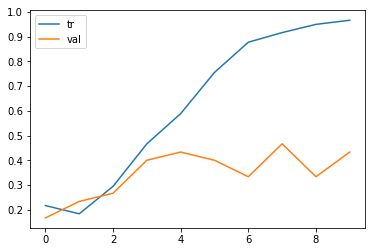

In [3]:
pd.DataFrame(acc_pre).plot()